In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/naveen/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.shape

(43824, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
'''
No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration
DEWP: Dew Point
TEMP: Temperature
PRES: Pressure
cbwd: Combined wind direction
Iws: Cumulated wind speed
Is: Cumulated hours of snow
Ir: Cumulated hours of rain
'''

'\nNo: row number\nyear: year of data in this row\nmonth: month of data in this row\nday: day of data in this row\nhour: hour of data in this row\npm2.5: PM2.5 concentration\nDEWP: Dew Point\nTEMP: Temperature\nPRES: Pressure\ncbwd: Combined wind direction\nIws: Cumulated wind speed\nIs: Cumulated hours of snow\nIr: Cumulated hours of rain\n'

In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [9]:
df.drop(['No'],inplace=True,axis=1)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [10]:
df['pm2.5'].fillna(0,inplace=True)

/tmp/ipykernel_34/461810712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(0,inplace=True)


In [11]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [12]:
from datetime import datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day','hour']])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [13]:
df.drop(['year','month','day','hour'],axis=1,inplace=True)
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [14]:
columns = df.columns.tolist()

# Move the last column to the first position
columns = [columns[-1]] + columns[:-1]

# Reorder the DataFrame columns
df = df[columns]
df.head()

,datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [15]:
df.isnull().sum()

datetime    0
pm2.5       0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [16]:
# manually specify column names
df.columns = ['date','pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [17]:
# drop the first 24 hours
df = df[24:]
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
24,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [18]:
df.values

array([[Timestamp('2010-01-02 00:00:00'), 129.0, -16, ..., 1.79, 0, 0],
       [Timestamp('2010-01-02 01:00:00'), 148.0, -15, ..., 2.68, 0, 0],
       [Timestamp('2010-01-02 02:00:00'), 159.0, -11, ..., 3.57, 0, 0],
       ...,
       [Timestamp('2014-12-31 21:00:00'), 10.0, -22, ..., 242.7, 0, 0],
       [Timestamp('2014-12-31 22:00:00'), 8.0, -22, ..., 246.72, 0, 0],
       [Timestamp('2014-12-31 23:00:00'), 12.0, -21, ..., 249.85, 0, 0]],
      dtype=object)

In [19]:
import matplotlib.pyplot as plt

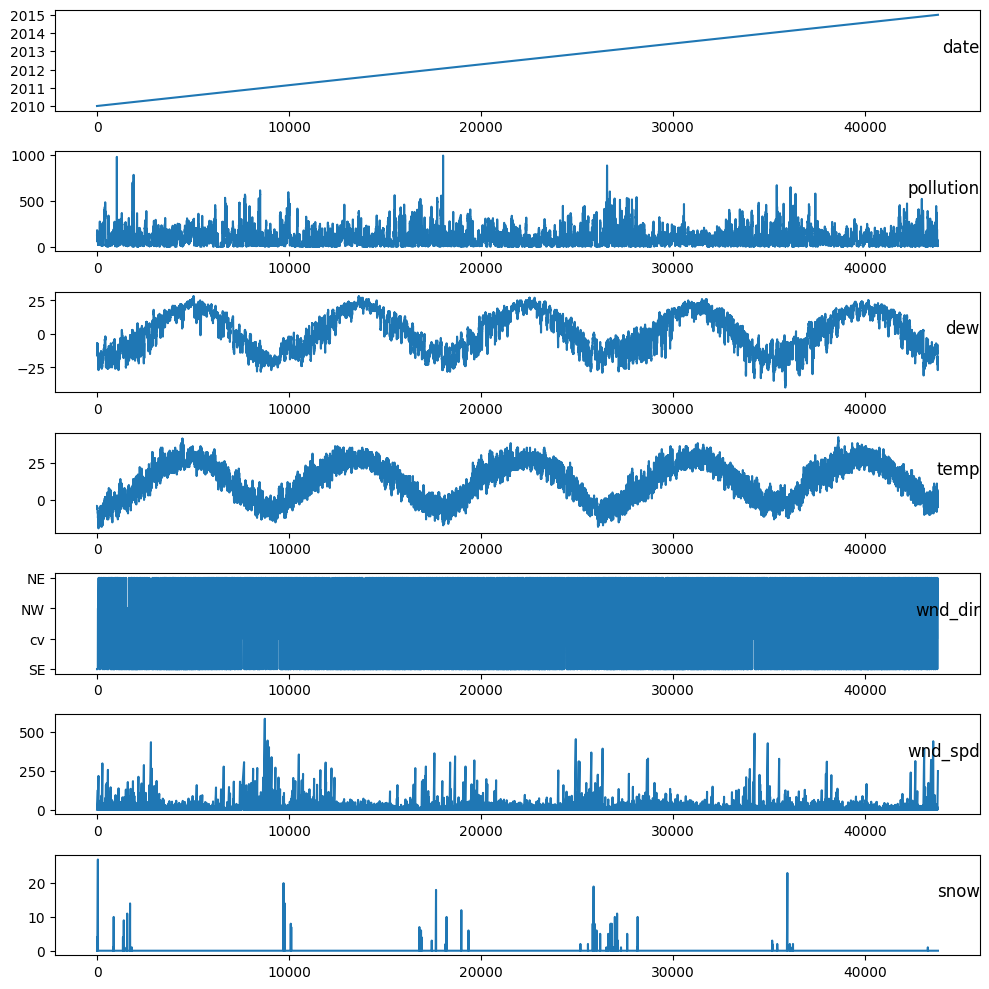

In [20]:
values = df.values

# Specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
num_groups = len(groups)

# Create subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(10, 10))

# Plot each column in a separate subplot
for i, group in enumerate(groups):
    ax = axes[i] if num_groups > 1 else axes  # Handle single subplot case
    ax.plot(values[:, group])
    ax.set_title(df.columns[group], y=0.5, loc='right')  # Set subplot title

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

In [21]:
from pandas import  DataFrame, concat
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [22]:
cat = df.select_dtypes(include='object')

In [23]:
le= LabelEncoder()

In [24]:
cat = le.fit_transform(cat)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
cat.dtype

dtype('int64')

In [26]:
df['wnd_dir']=cat

In [27]:
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
24,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [28]:
a=df.drop(['date'],axis=1)

In [29]:
a

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
24,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,1,231.97,0,0
43820,10.0,-22,-3.0,1034.0,1,237.78,0,0
43821,10.0,-22,-3.0,1034.0,1,242.70,0,0
43822,8.0,-22,-4.0,1034.0,1,246.72,0,0


In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Concatenate input and forecast sequences
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg


In [31]:
df=df.drop(['date'],axis=1)

In [32]:

# ensure all data is float
df = df.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


In [33]:
reframed.shape

(43799, 9)

In [34]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


In [35]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

2024-04-16 05:28:11.581871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 05:28:11.581984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 05:28:11.707184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
122/122 - 4s - 31ms/step - loss: 0.0540 - val_loss: 0.0541
Epoch 2/50
122/122 - 1s - 9ms/step - loss: 0.0368 - val_loss: 0.0560
Epoch 3/50
122/122 - 1s - 9ms/step - loss: 0.0214 - val_loss: 0.0469
Epoch 4/50
122/122 - 1s - 9ms/step - loss: 0.0171 - val_loss: 0.0388
Epoch 5/50
122/122 - 1s - 9ms/step - loss: 0.0156 - val_loss: 0.0252
Epoch 6/50
122/122 - 1s - 9ms/step - loss: 0.0149 - val_loss: 0.0199
Epoch 7/50
122/122 - 1s - 9ms/step - loss: 0.0148 - val_loss: 0.0190
Epoch 8/50
122/122 - 1s - 9ms/step - loss: 0.0148 - val_loss: 0.0173
Epoch 9/50
122/122 - 1s - 9ms/step - loss: 0.0146 - val_loss: 0.0162
Epoch 10/50
122/122 - 1s - 9ms/step - loss: 0.0145 - val_loss: 0.0157
Epoch 11/50
122/122 - 1s - 9ms/step - loss: 0.0146 - val_loss: 0.0155
Epoch 12/50
122/122 - 1s - 9ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 13/50
122/122 - 1s - 10ms/step - loss: 0.0145 - val_loss: 0.0148
Epoch 14/50
122/122 - 1s - 9ms/step - loss: 0.0144 - val_loss: 0.0146
Epoch 15/50
122/122 - 1s - 

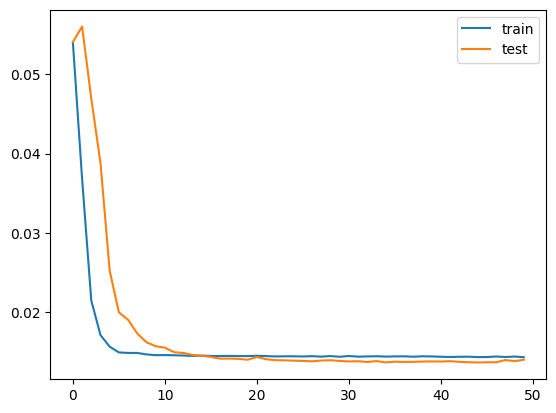

In [37]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [38]:
# Assuming 'model' is already defined and trained
# 'test_X' is the input features for the test dataset
from sklearn.metrics import mean_squared_error
# Make predictions
yhat = model.predict(test_X)

# Reshape test_X if needed
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_reshaped[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test RMSE: 26.792


# Evaluate model

# Train On Multiple Lag Timesteps

In [39]:
# # specify the number of lag hours
# n_hours = 3
# n_features = 8
# # frame as supervised learning
# reframed = series_to_supervised(scaled, n_hours, 1)

In [40]:
# # split into input and outputs
# n_obs = n_hours * n_features
# train_X, train_y = train[:, :n_obs], train[:, -n_features]
# test_X, test_y = test[:, :n_obs], test[:, -n_features]
# print(train_X.shape, len(train_X), train_y.shape)

(8760, 9) 8760 (8760,)


In [46]:
train_X.size

210240

In [47]:
print("Current shape of train_X:", train_X.shape)
print("Total number of elements in train_X:", train_X.size)


Current shape of train_X: (8760, 3, 8)
Total number of elements in train_X: 210240


In [48]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# # Load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values

# # Integer encode categorical 'wnd_dir' column (assuming it's column index 4)
# encoder = LabelEncoder()
# values[:, 4] = encoder.fit_transform(values[:, 4])

# # Ensure all data is float32
# values = values.astype('float32')

# # Normalize features using MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

# Specify the number of lag hours and features
n_hours = 3
n_features = 8

# Frame the dataset as supervised learning
# (Assuming 'series_to_supervised()' function is defined elsewhere)
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# Split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# Split into input (X) and output (y) variables
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Print shapes for verification
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(43797, 32)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)


Epoch 1/50
122/122 - 2s - 19ms/step - loss: 0.0521 - val_loss: 0.0433
Epoch 2/50
122/122 - 1s - 9ms/step - loss: 0.0259 - val_loss: 0.0333
Epoch 3/50
122/122 - 1s - 9ms/step - loss: 0.0208 - val_loss: 0.0226
Epoch 4/50
122/122 - 1s - 9ms/step - loss: 0.0206 - val_loss: 0.0212
Epoch 5/50
122/122 - 1s - 10ms/step - loss: 0.0203 - val_loss: 0.0200
Epoch 6/50
122/122 - 1s - 9ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 7/50
122/122 - 1s - 9ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 8/50
122/122 - 1s - 9ms/step - loss: 0.0192 - val_loss: 0.0182
Epoch 9/50
122/122 - 1s - 9ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 10/50
122/122 - 1s - 9ms/step - loss: 0.0183 - val_loss: 0.0176
Epoch 11/50
122/122 - 1s - 9ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 12/50
122/122 - 1s - 9ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 13/50
122/122 - 1s - 9ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 14/50
122/122 - 1s - 9ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 15/50
122/122 - 1s - 

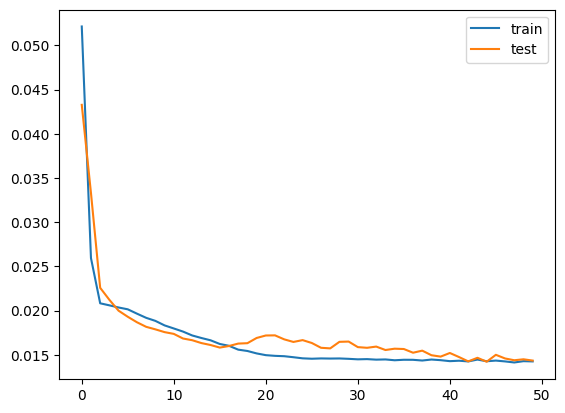

In [49]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()